# <span style = "color: orange;font-size:40px"> Titanic - Machine Learning from Disaster </span>

***

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Data Dictionary:
   * survived - (0 - No, 1 - Yes)
   * pclass - Ticket class
   * Sex - Sex
   * Age - Age in Years
   * Sibsp - No: of siblings/spouses aboard the Titanic
   * Parch - No: of parents/children aboard the Titanic
   * Ticket - Ticket Number
   * Fare - Passenger Fare
   * Cabin - Cabin Number
   * Embarked - Port of embarkation


### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'titanic.csv' dataset and store it in a variable

In [2]:
df = pd.read_csv('titanic.csv')

### View the top 5 rows

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### View the bottom 5 rows

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Find info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Find the statistical information about the dataset

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for null values

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check the unique values in Embarked

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Clean the dataset

### Remove unwanted features (PassengerId,Name, ticket, Cabin)

In [9]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Fill null values in Age with mean



In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### Fill null values in Embarked with 'Unknown'

In [12]:
df['Embarked'].fillna('Unknown', inplace = True)

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Convert the categorical datas into numerical ('Sex', 'Embarked')

In [14]:
df = pd.get_dummies(df, drop_first= True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,3,22.0,1,0,7.2500,True,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,False
4,0,3,35.0,0,0,8.0500,True,False,True,False


## Split the set into feature and target varibles(X,y)

In [15]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

### Check the shape of X and y

In [16]:
X.shape

(891, 9)

In [17]:
y.shape

(891,)

### Standardise the data with standard scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
xcolumns = X.columns

In [21]:
X = scaler.fit_transform(X)

In [22]:
X = pd.DataFrame(X, columns = xcolumns)

In [23]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306,-0.047431
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710,-0.047431
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306,-0.047431
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306,-0.047431
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306,-0.047431


## <span style = "color: green"> Visualization </span>

### Plot a pair plot

[]

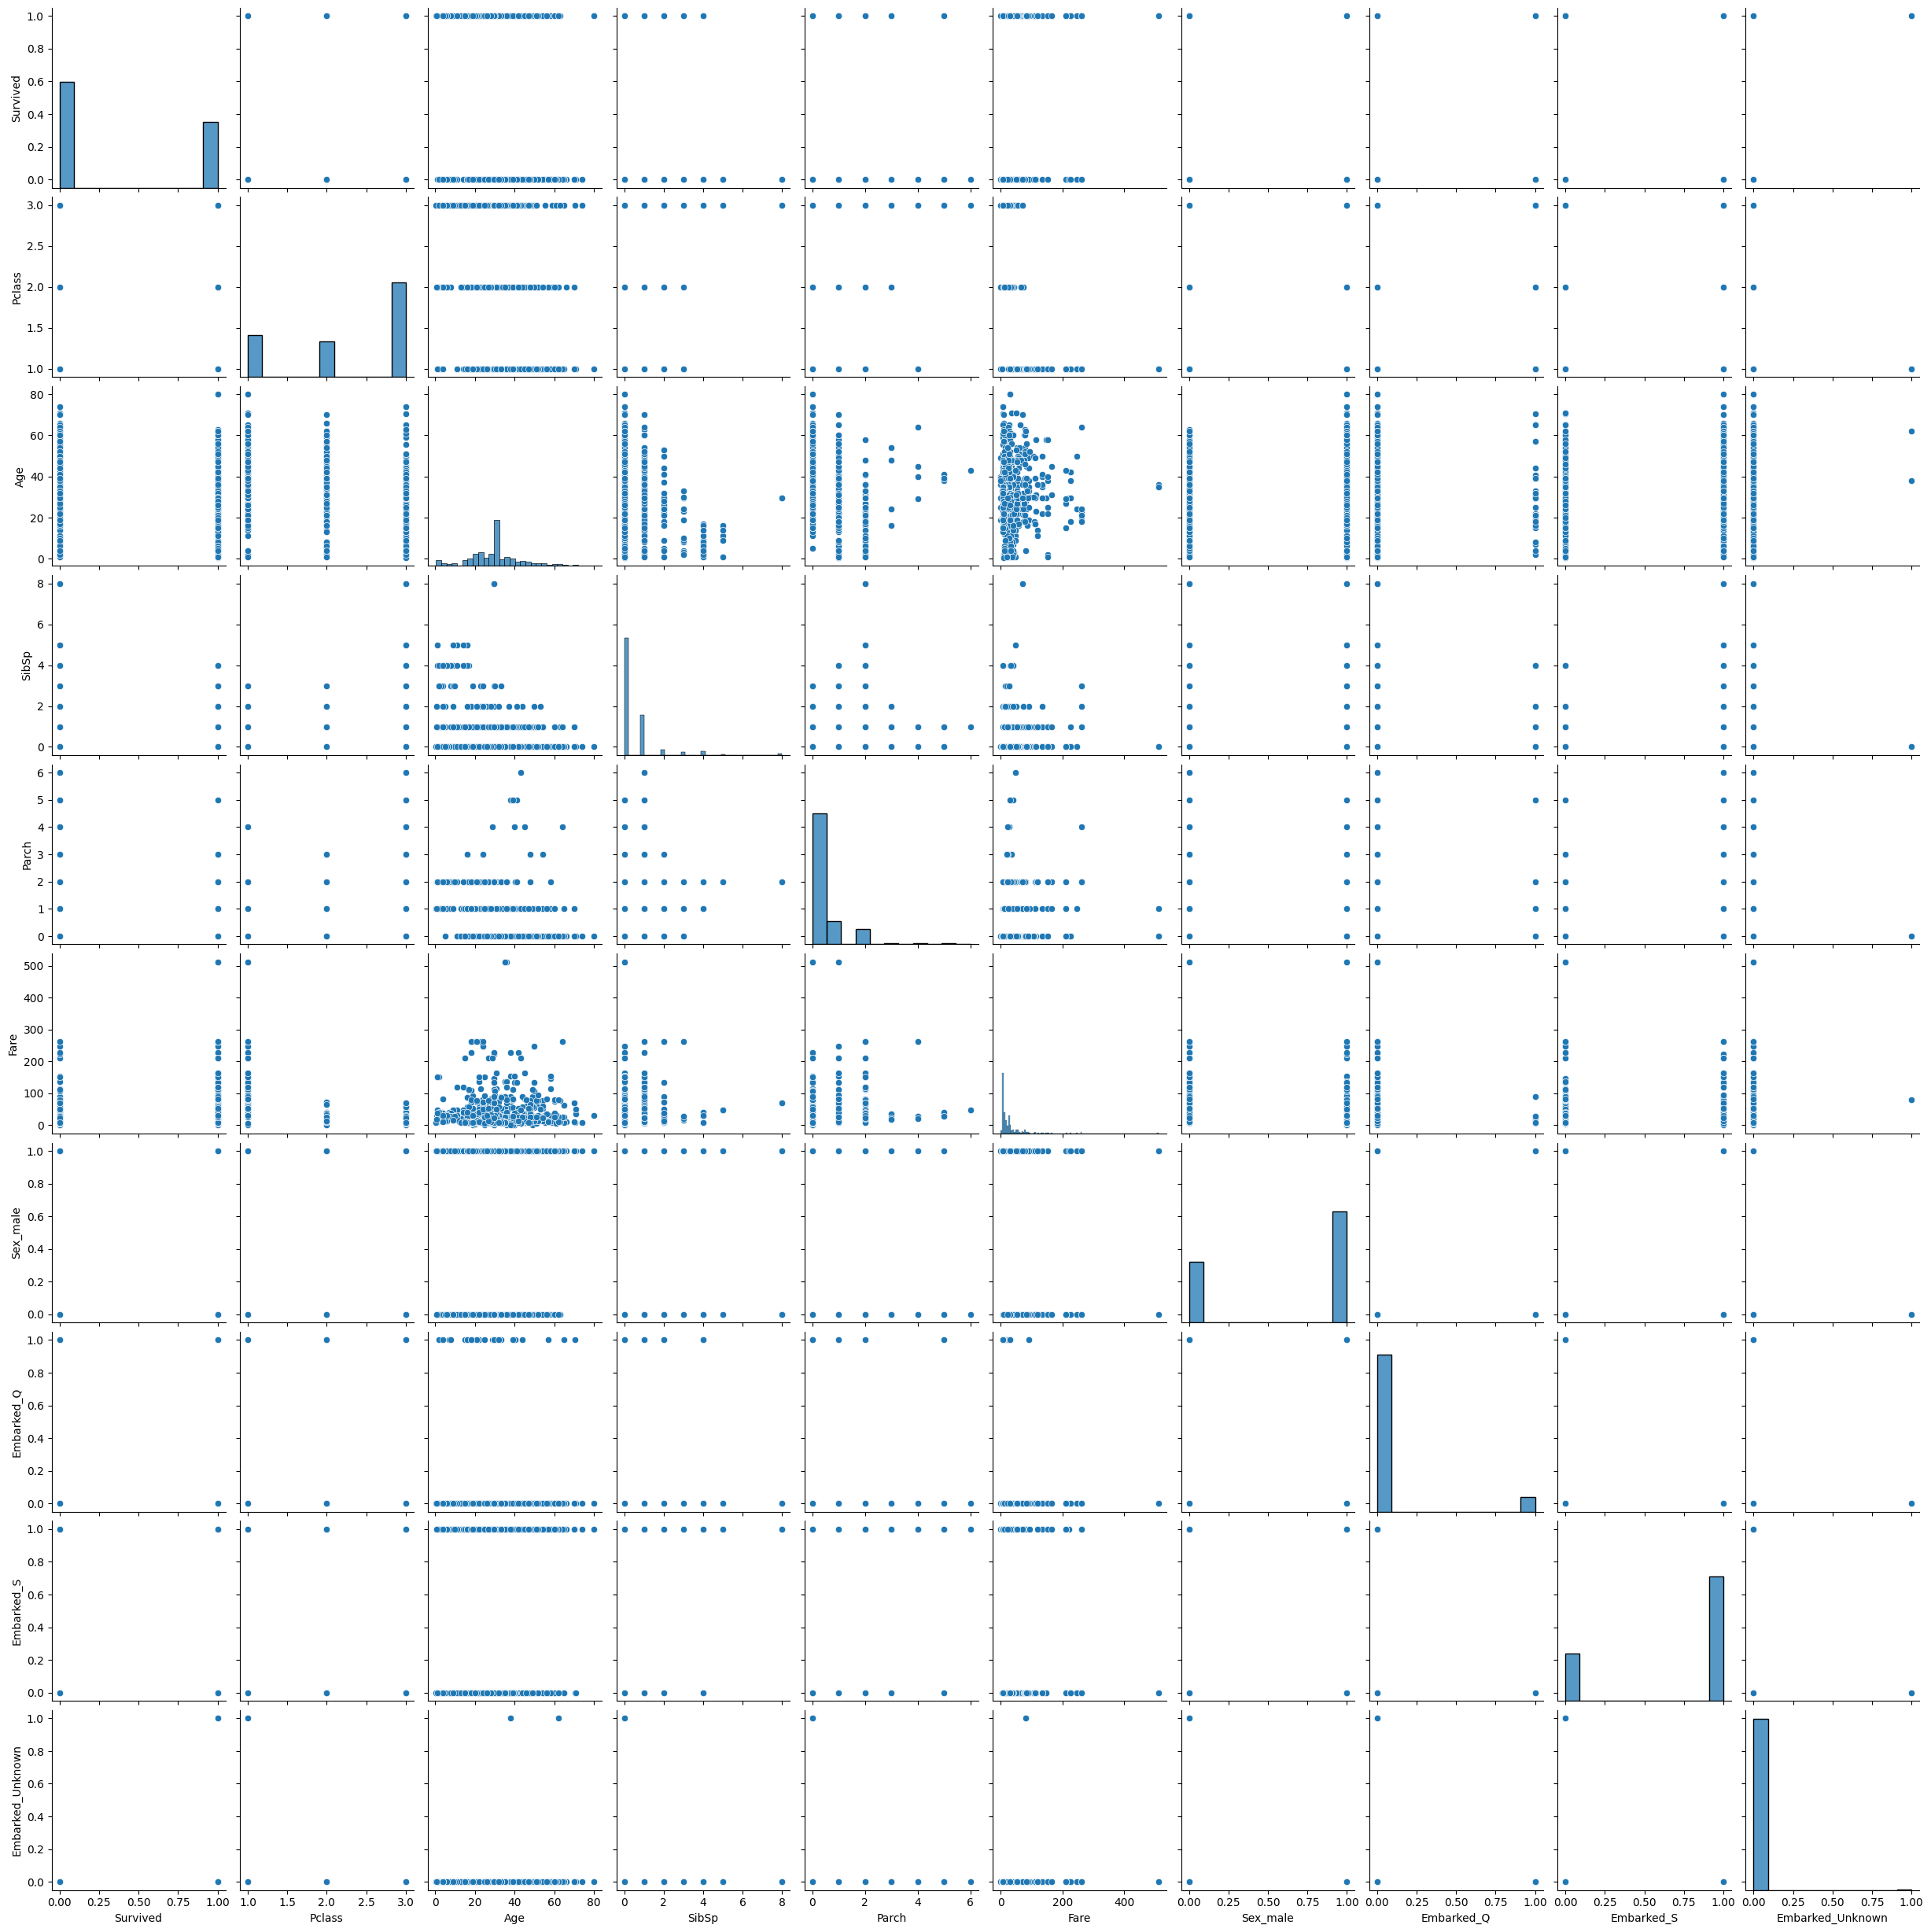

In [24]:
sns.pairplot(df)
plt.plot()

### Plot a heat map to view the correlation between features

[]

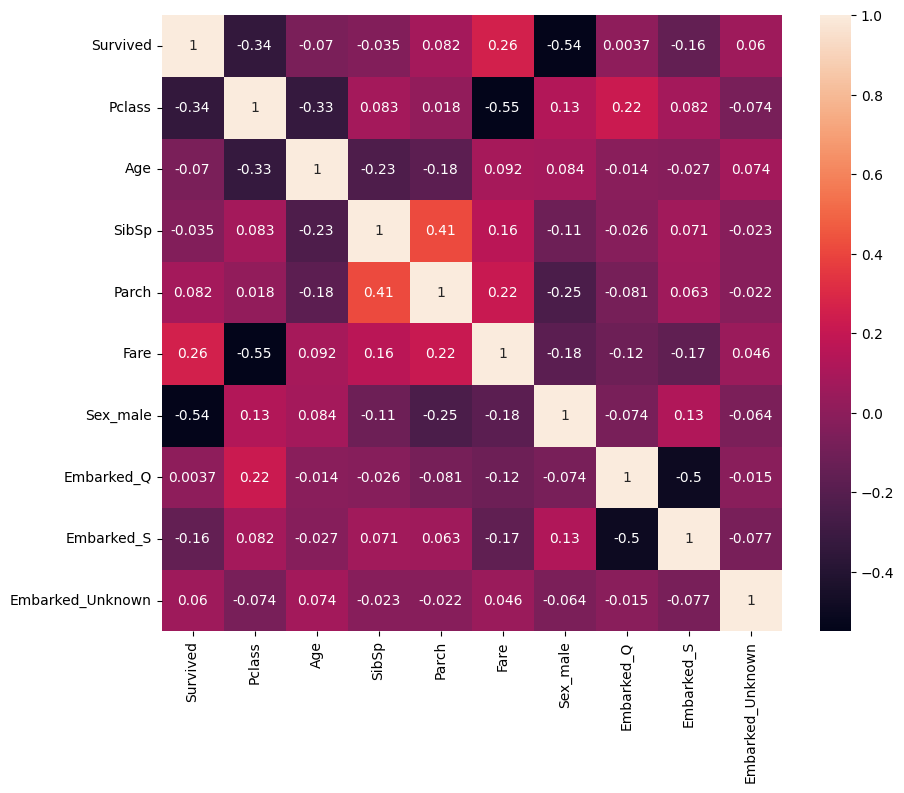

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)
plt.plot()

### Split the data into training and testing set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 100)

#### Check the shape of X_train and X_test

In [28]:
X_train.shape

(623, 9)

In [29]:
X_test.shape

(268, 9)

### Create a Logistic Regression model and Train it

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

### Check the score of our model

In [33]:
model.score(X_train,y_train)

0.8089887640449438

### Make predictions using X_test

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

### Check the accuracy score

In [35]:
from sklearn import metrics

In [36]:
metrics.accuracy_score(y_test,y_pred)

0.7910447761194029

### Check the confusion metrics

In [37]:
metrics.confusion_matrix(y_test,y_pred)

array([[139,  20],
       [ 36,  73]], dtype=int64)

### Plot confusion matrix

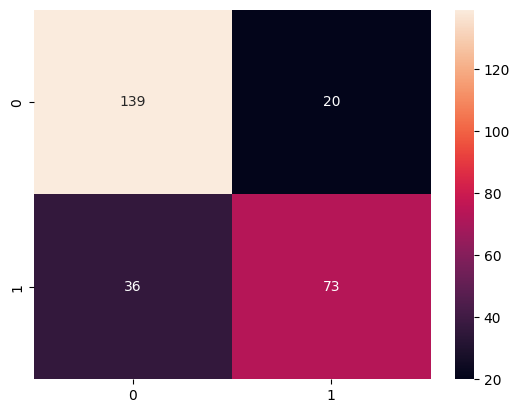

In [38]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

### Print the classification report

In [39]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.67      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>